In [79]:
#This program uses an artifical recurrent neural network called Long Short Memory(LSTM)
#to predict the closing price of a company. using the past x days Closing price data

In [80]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [81]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [82]:
#Fetching the stock data from Yahoo Finance
#Stock Selected is LUPIN
df = web.DataReader('LUPIN.NS',data_source='yahoo',start='2020-01-01',end='2021-09-08')

In [83]:
#Saving the data into a CSV file
df.to_csv("StockData.csv")

In [84]:
df.shape

(399, 6)

Text(0, 0.5, 'Closing Price')

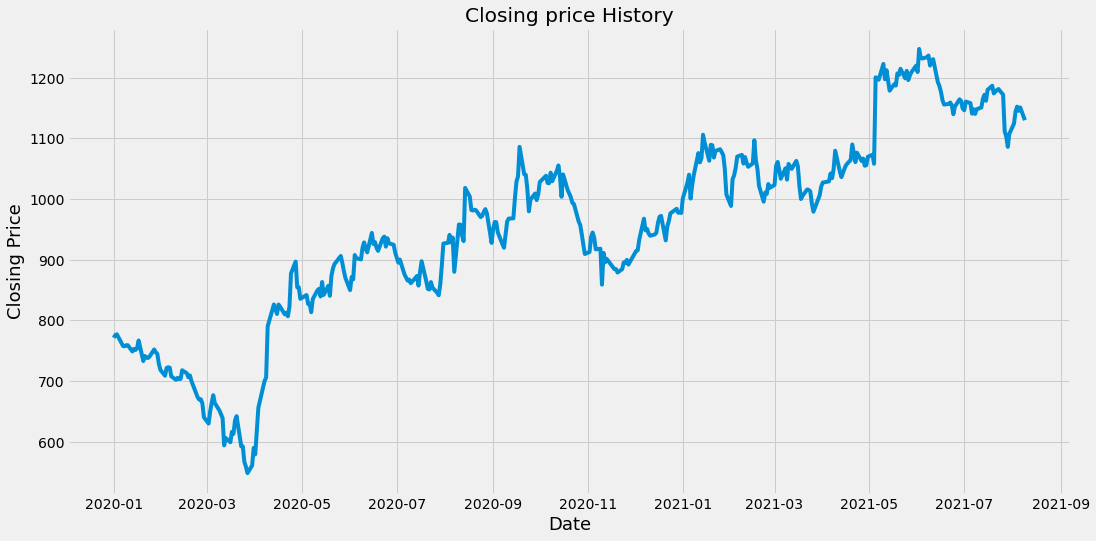

In [85]:
#visualize the closing price history 
plt.figure(figsize=(16,8))
plt.title("Closing price History")
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Closing Price',fontsize=18)

In [86]:
#Create a new DataFrame with only the Close Column
data = df.filter(['Close'])

In [87]:
data

,Close
Date,
2020-01-01,771.150024
2020-01-02,775.599976
2020-01-03,776.900024
2020-01-06,762.150024
2020-01-07,757.549988
...,...
2021-08-03,1144.199951
2021-08-04,1152.199951
2021-08-05,1145.300049


In [88]:
#Convert the data frame to a numpy array
dataset = data.values
print(dataset)

[[ 771.15002441]
 [ 775.59997559]
 [ 776.90002441]
 [ 762.15002441]
 [ 757.54998779]
 [ 757.09997559]
 [ 758.90002441]
 [ 758.95001221]
 [ 748.59997559]
 [ 752.79998779]
 [ 751.04998779]
 [ 753.95001221]
 [ 766.65002441]
 [ 732.70001221]
 [ 741.15002441]
 [ 738.40002441]
 [ 737.84997559]
 [ 740.15002441]
 [ 751.90002441]
 [ 747.40002441]
 [ 744.84997559]
 [ 728.34997559]
 [ 718.25      ]
 [ 708.65002441]
 [ 721.59997559]
 [ 722.5       ]
 [ 721.90002441]
 [ 707.59997559]
 [ 701.95001221]
 [ 705.04998779]
 [ 703.20001221]
 [ 703.40002441]
 [ 717.65002441]
 [ 712.54998779]
 [ 706.04998779]
 [ 709.04998779]
 [ 699.59997559]
 [ 672.84997559]
 [ 669.15002441]
 [ 669.79998779]
 [ 662.79998779]
 [ 640.        ]
 [ 629.79998779]
 [ 649.59997559]
 [ 664.40002441]
 [ 676.54998779]
 [ 663.5       ]
 [ 651.15002441]
 [ 638.79998779]
 [ 593.79998779]
 [ 605.84997559]
 [ 599.        ]
 [ 616.09997559]
 [ 612.90002441]
 [ 635.        ]
 [ 641.95001221]
 [ 592.15002441]
 [ 592.20001221]
 [ 566.5      

In [89]:
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*.8)

In [90]:
training_data_len           #80% of the data we have

320

In [91]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [92]:
print(scaled_data)

[[0.31903031]
 [0.32539511]
 [0.32725458]
 [0.30615754]
 [0.29957807]
 [0.29893441]
 [0.30150903]
 [0.30158053]
 [0.28677679]
 [0.2927841 ]
 [0.29028106]
 [0.29442899]
 [0.31259392]
 [0.26403494]
 [0.27612106]
 [0.27218772]
 [0.27140098]
 [0.27469076]
 [0.29149688]
 [0.28506049]
 [0.28141313]
 [0.25781305]
 [0.24336697]
 [0.22963605]
 [0.24815847]
 [0.24944578]
 [0.24858763]
 [0.22813415]
 [0.22005297]
 [0.22448689]
 [0.22184085]
 [0.22212693]
 [0.24250882]
 [0.2352142 ]
 [0.22591719]
 [0.23020812]
 [0.21669169]
 [0.17843095]
 [0.17313888]
 [0.17406852]
 [0.16405637]
 [0.13144536]
 [0.1168562 ]
 [0.14517628]
 [0.16634491]
 [0.1837231 ]
 [0.1650576 ]
 [0.14739333]
 [0.12972897]
 [0.0653651 ]
 [0.0826003 ]
 [0.07280272]
 [0.09726096]
 [0.09268404]
 [0.12429382]
 [0.13423448]
 [0.06300515]
 [0.06307664]
 [0.02631771]
 [0.01508982]
 [0.        ]
 [0.01787885]
 [0.05942937]
 [0.04426806]
 [0.15411571]
 [0.21733535]
 [0.22527354]
 [0.34620617]
 [0.39755418]
 [0.37516991]
 [0.39733968]
 [0.39

In [93]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([0.31903031, 0.32539511, 0.32725458, 0.30615754, 0.29957807,
       0.29893441, 0.30150903, 0.30158053, 0.28677679, 0.2927841 ,
       0.29028106, 0.29442899, 0.31259392, 0.26403494, 0.27612106,
       0.27218772, 0.27140098, 0.27469076, 0.29149688, 0.28506049,
       0.28141313, 0.25781305, 0.24336697, 0.22963605, 0.24815847,
       0.24944578, 0.24858763, 0.22813415, 0.22005297, 0.22448689,
       0.22184085, 0.22212693, 0.24250882, 0.2352142 , 0.22591719,
       0.23020812, 0.21669169, 0.17843095, 0.17313888, 0.17406852,
       0.16405637, 0.13144536, 0.1168562 , 0.14517628, 0.16634491,
       0.1837231 , 0.1650576 , 0.14739333, 0.12972897, 0.0653651 ,
       0.0826003 , 0.07280272, 0.09726096, 0.09268404, 0.12429382,
       0.13423448, 0.06300515, 0.06307664, 0.02631771, 0.01508982])]
[0.0]

[array([0.31903031, 0.32539511, 0.32725458, 0.30615754, 0.29957807,
       0.29893441, 0.30150903, 0.30158053, 0.28677679, 0.2927841 ,
       0.29028106, 0.29442899, 0.31259392, 0.264034

In [94]:
#Convert the x_train and y_train to numpy arrays
x_train,y_train = np.array(x_train), np.array(y_train)

In [95]:
#Reshape the data-LSTM expects a 3 dimensional data
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(260, 60, 1)

In [96]:
#Buid the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [97]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [134]:
#train the model
model.fit(x_train, y_train, batch_size = 1, epochs = 20)

Epoch 1/20
260/260 [==============================] - 4s 14ms/step - loss: 0.0012
Epoch 2/20
260/260 [==============================] - 4s 14ms/step - loss: 0.0012
Epoch 3/20
260/260 [==============================] - 4s 14ms/step - loss: 0.0013
Epoch 4/20
260/260 [==============================] - 4s 14ms/step - loss: 0.0014
Epoch 5/20
260/260 [==============================] - 4s 14ms/step - loss: 0.0012
Epoch 6/20
260/260 [==============================] - 4s 14ms/step - loss: 0.0013
Epoch 7/20
260/260 [==============================] - 4s 14ms/step - loss: 0.0013
Epoch 8/20
260/260 [==============================] - 4s 14ms/step - loss: 0.0012
Epoch 9/20
260/260 [==============================] - 4s 14ms/step - loss: 0.0013
Epoch 10/20
260/260 [==============================] - 4s 14ms/step - loss: 0.0013
Epoch 11/20
260/260 [==============================] - 4s 14ms/step - loss: 0.0012
Epoch 12/20
260/260 [==============================] - 4s 14ms/step - loss: 0.0013
Epoch 13/20
2

In [135]:
#Create Testing data set
#Create new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len: , :]
for i in range(60, len(test_data)):
     x_test.append(test_data[i-60:i, 0])

In [136]:
#Convert data to a numpy array
x_test = np.array(x_test)


In [137]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [138]:
#get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [139]:
#root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)

In [145]:
#The smaller the RMSE value, the better the model
rmse

1.7526391910601267

<ipython-input-146-504501b4053c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


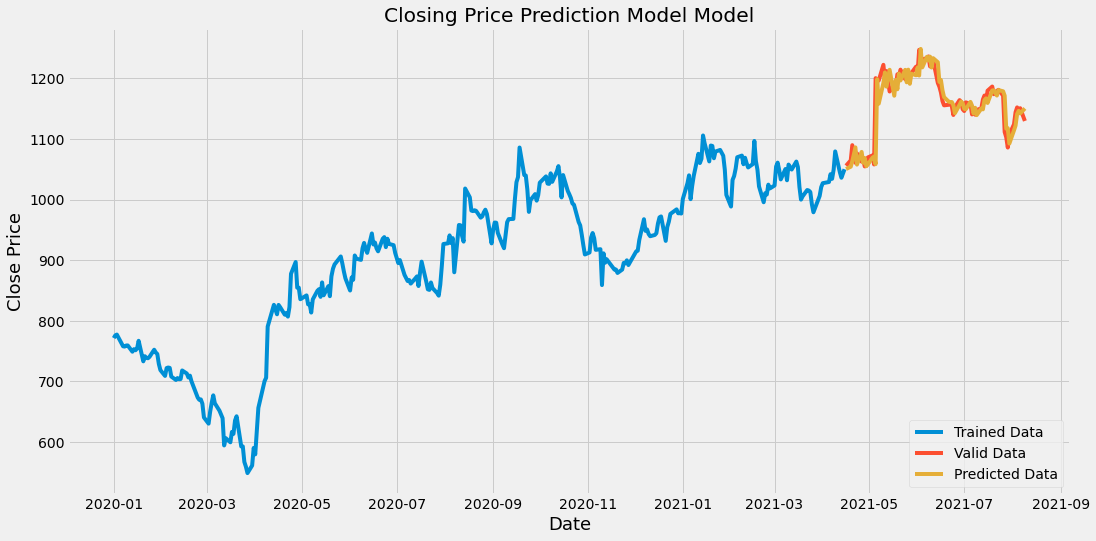

In [146]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Closing Price Prediction Model Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Trained Data','Valid Data','Predicted Data'], loc='lower right')
plt.show()

In [147]:
#Valid price and Predicted price
valid

,Close,Predictions
Date,,
2021-04-16,1055.849976,1050.462646
2021-04-19,1064.650024,1054.266357
2021-04-20,1089.800049,1063.170166
2021-04-22,1060.750000,1086.182739
2021-04-23,1076.250000,1057.681885
...,...,...
2021-08-03,1144.199951,1122.215820
2021-08-04,1152.199951,1141.315186
2021-08-05,1145.300049,1146.449707


In [148]:
valid.head()

,Close,Predictions
Date,,
2021-04-16,1055.849976,1050.462646
2021-04-19,1064.650024,1054.266357
2021-04-20,1089.800049,1063.170166
2021-04-22,1060.750000,1086.182739
2021-04-23,1076.250000,1057.681885


In [149]:
valid.tail()

,Close,Predictions
Date,,
2021-08-03,1144.199951,1122.215820
2021-08-04,1152.199951,1141.315186
2021-08-05,1145.300049,1146.449707
2021-08-06,1150.849976,1142.284912
2021-08-09,1129.800049,1150.482788
